#### Финальная работа

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

- Загрузим необходимые библиотеки

In [1]:
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from scipy import stats

### 1. Загрузите датасет taxi.csv.

In [2]:
data = pd.read_csv('taxi.csv')
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


#### Описание столбцов:
- offer_gk - номер ордера
- weekday_key - день недели
- hour_key - время
- driver_gk - номер водителя
- order_gk - номер заказа
- driver_latitude - широта нахождения водителя в момент заказа
- driver_longitude - долгота нахождения водителя в момент заказа
- origin_order_latitude - широта заказа
- origin_order_longitude - долгота заказа
- distance_km - дистанция поездки, км
- duration_min - время поездки, мин
- offer_class_group - класс заказа
- ride_type_desc - тип заказа
- driver_response - наличие отклик

### 2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

In [4]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_gk,100000,NaN,NaN,NaN,566219,325936,4,285555,565672,848720,1.13036e+06
weekday_key,100000,NaN,NaN,NaN,3.15986,2.05422,0,1,3,5,6
hour_key,100000,NaN,NaN,NaN,13.8278,7.3065,0,8,16,20,23
driver_gk,100000,NaN,NaN,NaN,3446.38,2038.74,14,1421,3506.5,5242,6806
order_gk,100000,NaN,NaN,NaN,460867,266065,18,229178,462420,690894,920344
driver_latitude,100000,NaN,NaN,NaN,55.7008,2.1359,-1,55.7087,55.7729,55.9607,56.1741
driver_longitude,100000,NaN,NaN,NaN,37.4923,1.45464,-1,37.4135,37.5337,37.6241,38.2805
origin_order_latitude,100000,NaN,NaN,NaN,55.7724,0.665985,-1,55.708,55.7726,55.962,56.3111
origin_order_longitude,100000,NaN,NaN,NaN,37.5416,0.467758,-1,37.4071,37.5325,37.6244,38.2436
distance_km,100000,NaN,NaN,NaN,18.3935,41.1293,-1,-1,10.4115,30.6653,5234.28


- Посмотрим, что в себе содержит offer_class_group

In [5]:
data['offer_class_group'].unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

- В группа присутствует стандартный набор для групп такси, но при этом присутствует значение Test

In [6]:
temp_data_2 = data[data['offer_class_group'] == 'Test']
temp_data_2.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_gk,8,NaN,NaN,NaN,884192,305933,159224,885642,972345,1.04496e+06,1.12224e+06
weekday_key,8,NaN,NaN,NaN,3.125,1.72689,1,1.75,3,5,5
hour_key,8,NaN,NaN,NaN,18.75,3.37004,14,16.5,19,20.75,23
driver_gk,8,NaN,NaN,NaN,2941.38,2417.42,172,992.25,2643.5,4394.75,6302
order_gk,8,NaN,NaN,NaN,304023,164947,83260,173199,341657,417800,493264
driver_latitude,8,NaN,NaN,NaN,55.851,0.0774203,55.7612,55.8096,55.8223,55.9012,55.9649
driver_longitude,8,NaN,NaN,NaN,37.5617,0.103342,37.4135,37.4854,37.5971,37.6513,37.6576
origin_order_latitude,8,NaN,NaN,NaN,55.8514,0.0771209,55.7573,55.8137,55.8281,55.895,55.9623
origin_order_longitude,8,NaN,NaN,NaN,37.571,0.113951,37.4071,37.4868,37.6252,37.661,37.6684
distance_km,8,NaN,NaN,NaN,-1,0,-1,-1,-1,-1,-1


- Тестовых записей 8, значения не имеют дистанций. Их необходимо удалить

In [7]:
data = data[data['offer_class_group'] != 'Test']

- Посмотрим, что в себе содержит ride_type_desc

In [8]:
data['ride_type_desc'].unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

- Среди типов присутствуют affiliate и SMB. Если верить Google, то это партнерские такси

In [9]:
temp_data_3 = data[data['ride_type_desc'] == 'affiliate']
temp_data_3.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_gk,224,NaN,NaN,NaN,562323,331529,377,293732,576829,847974,1.12922e+06
weekday_key,224,NaN,NaN,NaN,3.70536,2.03176,0,2,4,5.25,6
hour_key,224,NaN,NaN,NaN,12.6562,7.01329,0,7,14,19,23
driver_gk,224,NaN,NaN,NaN,3388.45,2027.01,75,1479,3364,5148,6762
order_gk,224,NaN,NaN,NaN,452775,269631,2357,218231,473491,665673,916398
driver_latitude,224,NaN,NaN,NaN,55.8065,0.160092,55.3932,55.7337,55.8512,55.9605,55.9667
driver_longitude,224,NaN,NaN,NaN,37.5155,0.161627,37.2832,37.4101,37.4353,37.5856,37.9956
origin_order_latitude,224,NaN,NaN,NaN,55.807,0.160204,55.3898,55.7351,55.858,55.9616,55.9664
origin_order_longitude,224,NaN,NaN,NaN,37.5154,0.161477,37.2866,37.4062,37.4369,37.5841,37.9805
distance_km,224,NaN,NaN,NaN,-1,0,-1,-1,-1,-1,-1


- Строк с типом affiliate 224 и они все не имеют дистанции. Данные записи удаляем

In [10]:
data = data[data['ride_type_desc'] != 'affiliate']

In [11]:
temp_data_3 = data[data['ride_type_desc'] == 'SMB']
temp_data_3.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_gk,28,NaN,NaN,NaN,596340,304465,46063,374442,561078,797413,1.11505e+06
weekday_key,28,NaN,NaN,NaN,3.71429,1.11744,1,3,4,4.25,6
hour_key,28,NaN,NaN,NaN,15.6429,6.34919,0,13,16.5,21,23
driver_gk,28,NaN,NaN,NaN,2649.57,1736.34,259,1358,2082.5,3491.75,6450
order_gk,28,NaN,NaN,NaN,485021,222521,126932,349478,521426,587506,895244
driver_latitude,28,NaN,NaN,NaN,55.7903,0.134705,55.5448,55.6789,55.7693,55.9614,55.9663
driver_longitude,28,NaN,NaN,NaN,37.5278,0.112521,37.2861,37.4135,37.5636,37.5833,37.7636
origin_order_latitude,28,NaN,NaN,NaN,55.7891,0.136104,55.5481,55.6815,55.7662,55.9623,55.9649
origin_order_longitude,28,NaN,NaN,NaN,37.5241,0.11092,37.2907,37.4119,37.5605,37.5826,37.746
distance_km,28,NaN,NaN,NaN,16.2074,18.5654,-1,-1,8.8975,26.33,51.891


- Строк с типом SMB всего 28 и большая часть имеет полный набор данных. Данные оставим

In [12]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_gk,99768,NaN,NaN,NaN,566202,325916,4,285537,565604,848663,1.13036e+06
weekday_key,99768,NaN,NaN,NaN,3.15864,2.05415,0,1,3,5,6
hour_key,99768,NaN,NaN,NaN,13.83,7.30707,0,8,16,20,23
driver_gk,99768,NaN,NaN,NaN,3446.55,2038.75,14,1421,3507,5242,6806
order_gk,99768,NaN,NaN,NaN,460898,266061,18,229194,462434,691036,920344
driver_latitude,99768,NaN,NaN,NaN,55.7006,2.13837,-1,55.7086,55.7728,55.9607,56.1741
driver_longitude,99768,NaN,NaN,NaN,37.4922,1.45631,-1,37.4135,37.5338,37.6242,38.2805
origin_order_latitude,99768,NaN,NaN,NaN,55.7724,0.666713,-1,55.708,55.7724,55.962,56.3111
origin_order_longitude,99768,NaN,NaN,NaN,37.5417,0.468237,-1,37.4071,37.5326,37.6244,38.2436
distance_km,99768,NaN,NaN,NaN,18.4386,41.1664,-1,-1,10.468,30.7275,5234.28


#### Первый взгляд:
- После первой очистки база содержит 99768 строк без явных пустот (NULL)
- В показателях "driver_latitude", "driver_longitude", "origin_order_latitude", "origin_order_longitude", "distance_km" и "duration_min" присутствуют значения "-1". Хотя координаты, дистанция и время не может иметь отрицательные значения. Это говорит об отсутствии данных!
- Показатель "offer_class_group" имеет 8 различных текстовых значений. При этом удалены значения test! Требуется преобразование в числовое значение
- Показатель "ride_type_desc" имеет 3 различных уникальных значения. При этом удалены значения affiliate. Требуется преобразование в числовое значение
- Неделя и час заказов - это раздельный показатель. Возможно есть смысл посмотреть на обобщенный показатель
- Особое внимание, к очень большому значению показателя distance_km (максимальное более 5000 км???) 

### 5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).

- Преобразуем категориальные показатели в числовые:
- offer_class_group в псевдо-порядковые номера - Economy - 1, Standard - 2, XL - 3, Kids - 4, Delivery - 5, Premium - 6, VIP - 7, VIP+ - 8
- ride_type_desc в псевдо-порядковые номера - private - 1, business - 2, SMB - 3

In [13]:
data.loc[(data.offer_class_group == 'Economy'), 'offer_class'] = 1
data.loc[(data.offer_class_group == 'Standard'), 'offer_class'] = 2
data.loc[(data.offer_class_group == 'XL'), 'offer_class'] = 3
data.loc[(data.offer_class_group == 'Kids'), 'offer_class'] = 4
data.loc[(data.offer_class_group == 'Delivery'), 'offer_class'] = 5
data.loc[(data.offer_class_group == 'Premium'), 'offer_class'] = 6
data.loc[(data.offer_class_group == 'VIP'), 'offer_class'] = 7
data.loc[(data.offer_class_group == 'VIP+'), 'offer_class'] = 8

data.loc[(data.ride_type_desc == 'private'), 'ride_type'] = 1
data.loc[(data.ride_type_desc == 'business'), 'ride_type'] = 2
data.loc[(data.ride_type_desc == 'SMB'), 'ride_type'] = 3

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99768 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   offer_gk                99768 non-null  int64  
 1   weekday_key             99768 non-null  int64  
 2   hour_key                99768 non-null  int64  
 3   driver_gk               99768 non-null  int64  
 4   order_gk                99768 non-null  int64  
 5   driver_latitude         99768 non-null  float64
 6   driver_longitude        99768 non-null  float64
 7   origin_order_latitude   99768 non-null  float64
 8   origin_order_longitude  99768 non-null  float64
 9   distance_km             99768 non-null  float64
 10  duration_min            99768 non-null  float64
 11  offer_class_group       99768 non-null  object 
 12  ride_type_desc          99768 non-null  object 
 13  driver_response         99768 non-null  int64  
 14  offer_class             99768 non-null

### 3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.

- Как писал выше показатели "driver_latitude", "driver_longitude", "origin_order_latitude", "origin_order_longitude", "distance_km" и "duration_min" имеют значения "-1", что свидетельствует об отсутствии данных.
- Необходимо ознакомиться какие именно остальные значения у данных строк для принятия решения
- сами координаты не несут полезной информации, а вот расстояние между координатами может быть полезной. По сути это рассрояние водителя до точки заказа в момент заказа

- Отсутствует 26359 строк дистанции и времени!  - очень важное значение
- Отсутствует около 150 строк с координатами! 

In [14]:
temp_data = data.query('distance_km > 0')
temp_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_gk,73641,NaN,NaN,NaN,565765,326282,4,284862,564808,849568,1.13036e+06
weekday_key,73641,NaN,NaN,NaN,3.15034,2.07815,0,1,3,5,6
hour_key,73641,NaN,NaN,NaN,13.8045,7.31437,0,8,16,20,23
driver_gk,73641,NaN,NaN,NaN,3461.62,2039.42,14,1421,3507,5246,6806
order_gk,73641,NaN,NaN,NaN,461920,266119,27,230547,463102,692512,920344
driver_latitude,73641,NaN,NaN,NaN,55.7662,0.924575,-1,55.7058,55.7748,55.9611,56.0185
driver_longitude,73641,NaN,NaN,NaN,37.5365,0.638673,-1,37.4135,37.5283,37.6256,38.2328
origin_order_latitude,73641,NaN,NaN,NaN,55.7716,0.712029,-1,55.7056,55.775,55.9623,56.0251
origin_order_longitude,73641,NaN,NaN,NaN,37.5404,0.498504,-1,37.4071,37.5273,37.6254,38.2041
distance_km,73641,NaN,NaN,NaN,25.3332,45.9828,0.005,7.961,18.67,38.79,5234.28


#### Наблюдение по пропускам:
- Показатель дистанции и время заказа очень важные для анализа показатели!
- Не смотря на то, что строк с пустыми дистанциями более 26%, вынуждены их исключить (создана база temp_data)
- При этом очень высокое значение distance_km осталось. К тому же после очистки базы от пустых значений дистанции, мы четко понимаем, что 75% заказов до 40 км. Предлагаем удалить выбросы с дистанцией более 75 км (примерно 1000 строк)

In [15]:
temp_data = temp_data.query('distance_km < 75')
temp_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_gk,72609,NaN,NaN,NaN,565672,326326,4,284733,564488,849625,1.13036e+06
weekday_key,72609,NaN,NaN,NaN,3.15334,2.0758,0,1,3,5,6
hour_key,72609,NaN,NaN,NaN,13.823,7.29533,0,8,16,20,23
driver_gk,72609,NaN,NaN,NaN,3458.59,2037.74,14,1421,3507,5242,6806
order_gk,72609,NaN,NaN,NaN,462013,266088,27,230773,463389,692558,920344
driver_latitude,72609,NaN,NaN,NaN,55.7716,0.802492,-1,55.708,55.775,55.9611,56.0185
driver_longitude,72609,NaN,NaN,NaN,37.5372,0.557123,-1,37.4135,37.5273,37.6238,38.2328
origin_order_latitude,72609,NaN,NaN,NaN,55.7733,0.716277,-1,55.7075,55.7753,55.9623,56.0251
origin_order_longitude,72609,NaN,NaN,NaN,37.5384,0.500936,-1,37.4071,37.5264,37.6237,38.2041
distance_km,72609,NaN,NaN,NaN,23.6535,18.379,0.005,7.844,18.249,37.763,74.954


### 4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.

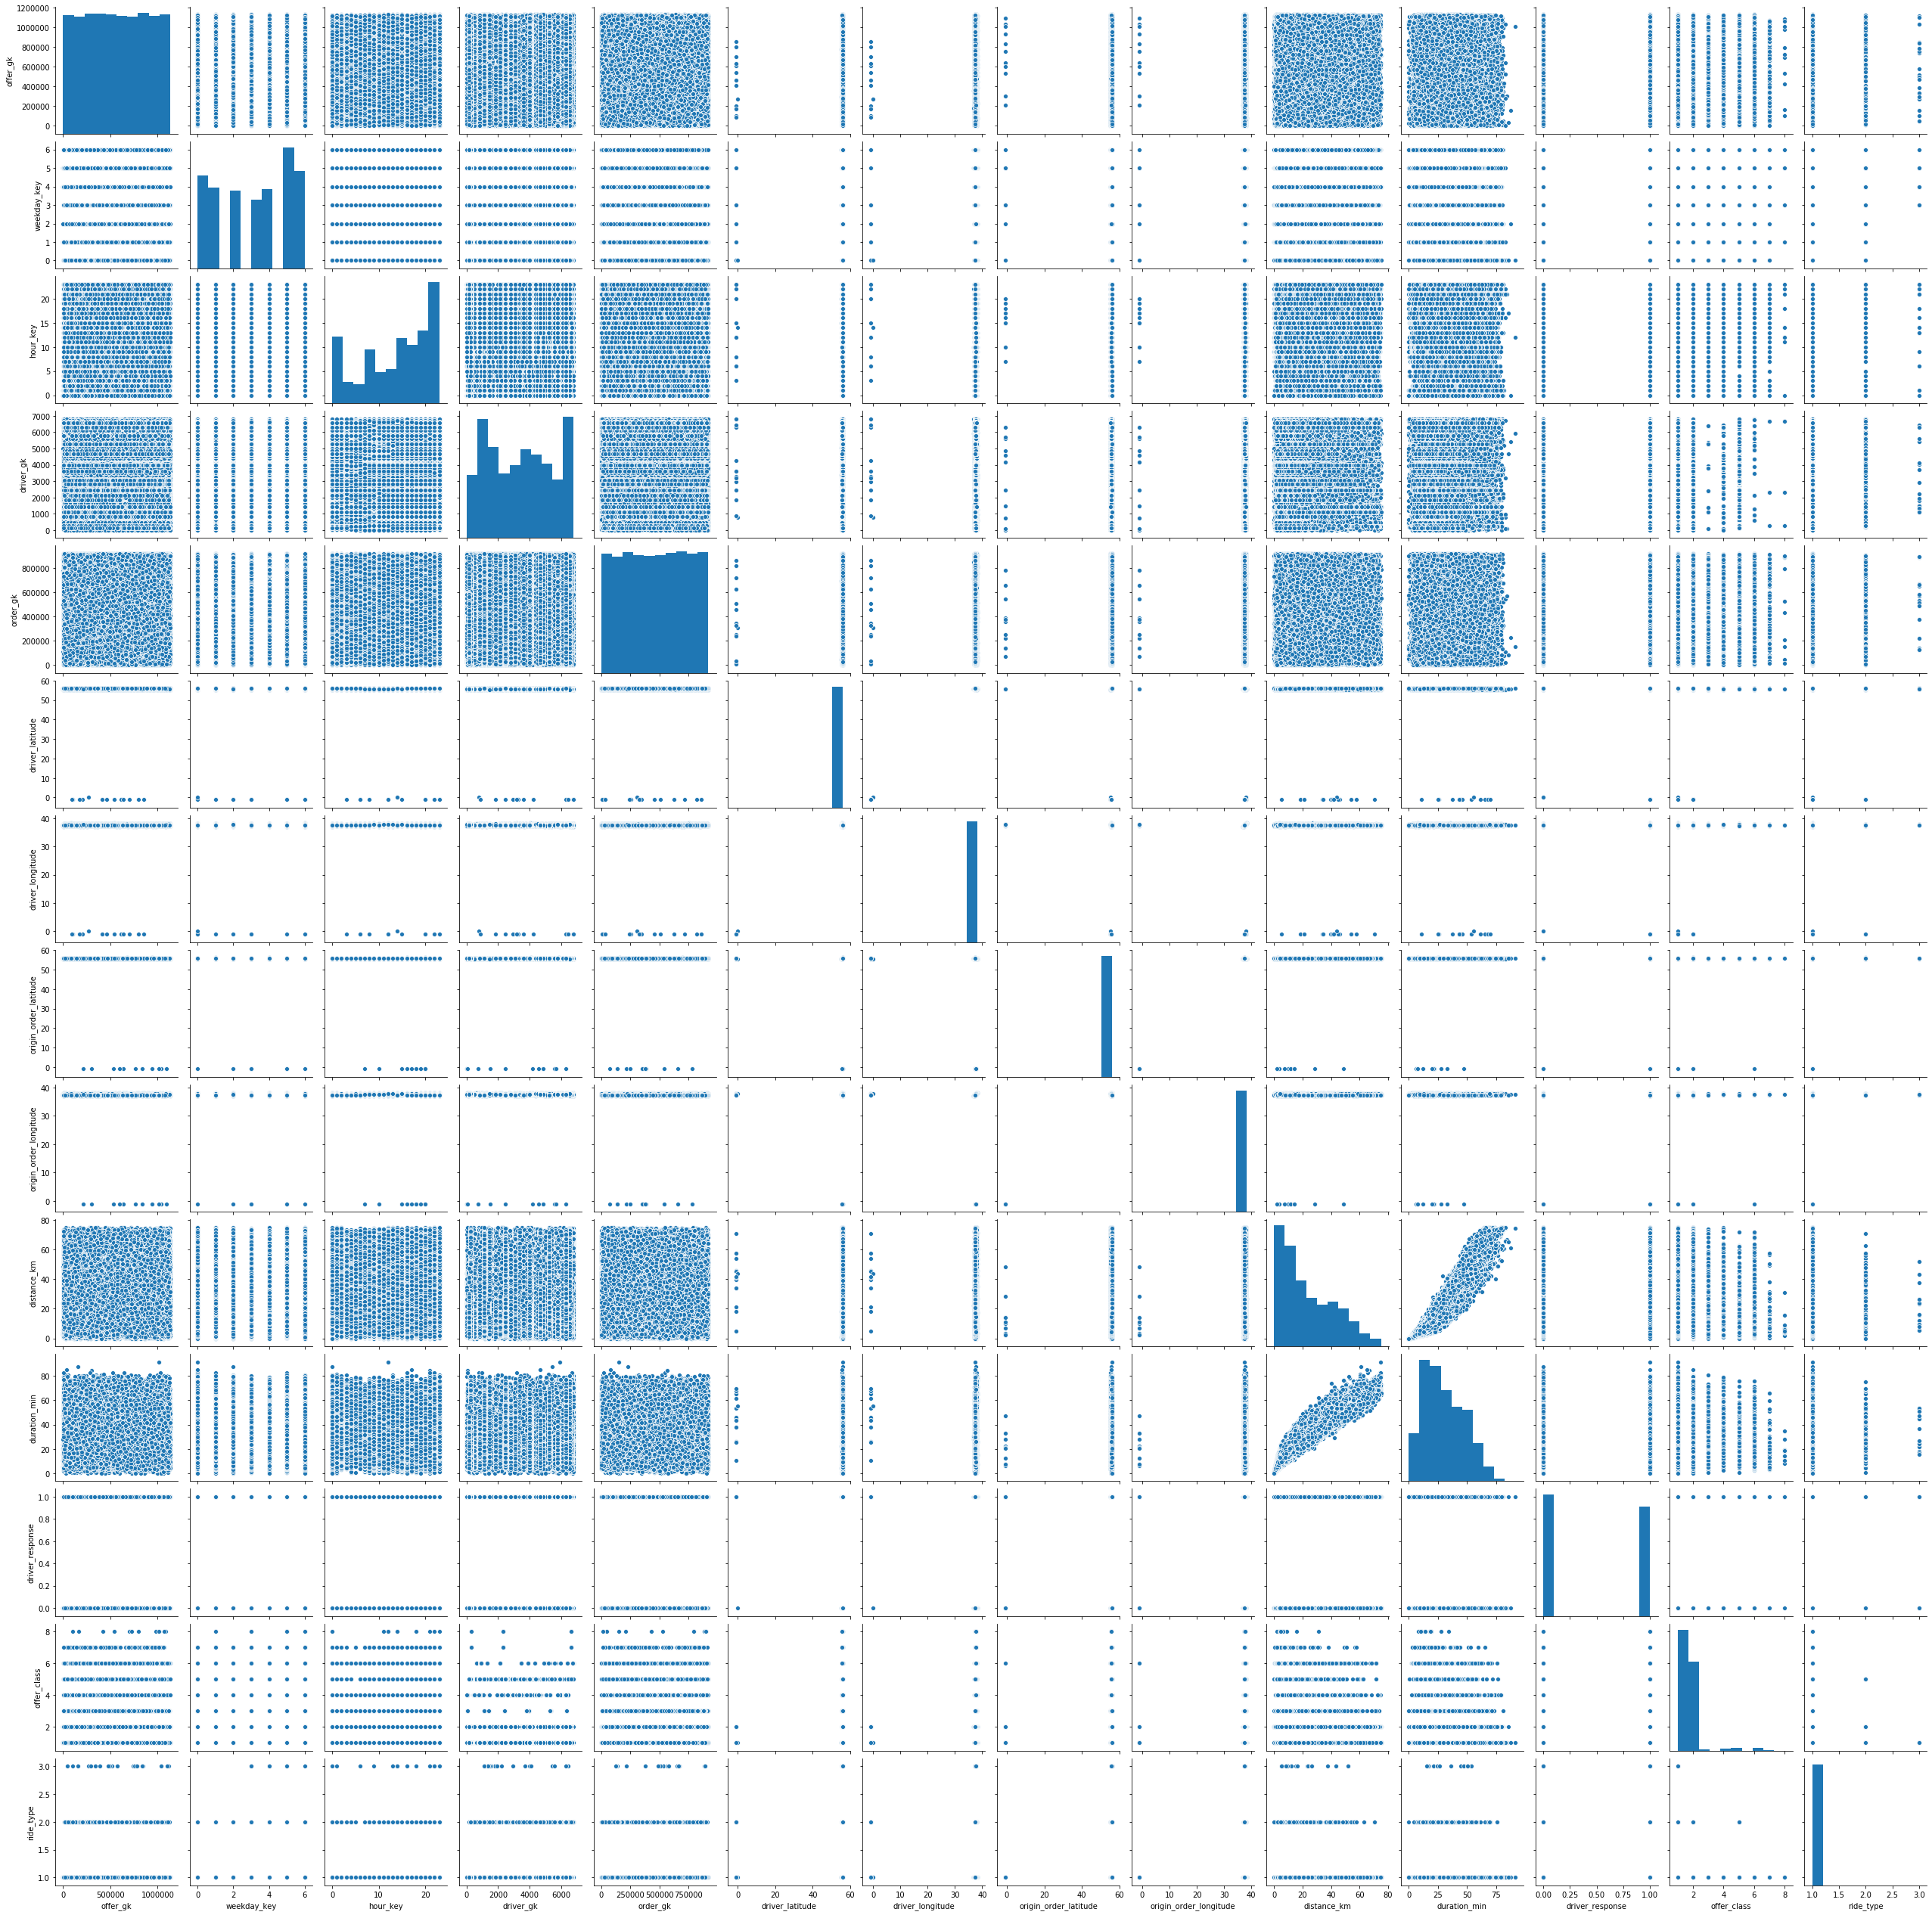

In [16]:
sns.pairplot(temp_data)

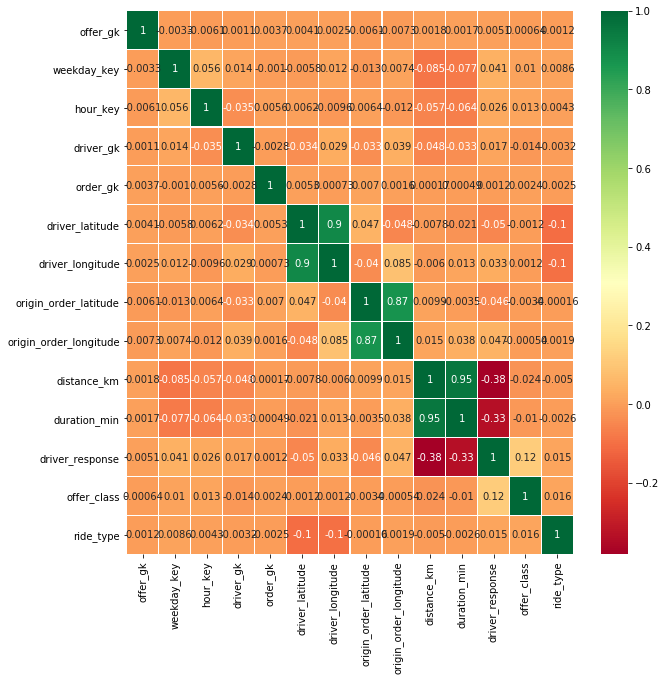

In [17]:
sns.heatmap(temp_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

- Как видно из матрицы корреляции пара дистанция и время имеют корреляцию приближенную к 1. В дальнейшем одним из показателей можно пожертвовать

### 6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

- 1 ---> Как вариант нового признака - это расстояние между координатами где находится водитель и точкой заказа. Для этого используем библиотеку gejdesic

In [18]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [19]:
from geopy.distance import geodesic

- Функция geodesic принимает пару координат. Поэтому созданим пары координат во временной базе для удобства.

In [20]:
temp_data_2 = temp_data.query('driver_latitude > 0')
temp_data_2 = temp_data.query('origin_order_latitude > 0')

In [21]:
temp_data_2['driver_coordinate'] = temp_data_2.apply(lambda x: (x['driver_latitude'], x['driver_longitude']), axis=1)
temp_data_2['origin_order_coordinate'] = temp_data_2.apply(lambda x: (x['origin_order_latitude'], x['origin_order_longitude']), axis=1)
temp_data_2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class,ride_type,driver_coordinate,origin_order_coordinate
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,2.0,1.0,"(55.805342, 37.515023)","(55.819329, 37.466398)"
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,1.0,1.0,"(55.81397800000001, 37.347688)","(55.814827, 37.354074)"
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,1.0,1.0,"(55.803578, 37.521602)","(55.812559, 37.527407)"
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0,1.0,1.0,"(55.818963, 37.361033)","(55.814827, 37.354074)"
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0,1.0,1.0,"(55.83931800000001, 37.248862)","(55.839134, 37.304101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,726210,0,2,2442,27360,55.961246,37.413497,55.966694,37.415754,17.378,29.817,Economy,private,0,1.0,1.0,"(55.961246, 37.413497)","(55.966694, 37.415754)"
99996,881472,0,1,2442,381960,55.961246,37.413497,55.964892,37.413543,7.751,12.683,Economy,private,0,1.0,1.0,"(55.961246, 37.413497)","(55.964892000000006, 37.413543)"
99997,626673,1,20,2442,627126,55.961315,37.413497,55.962203,37.416373,46.983,46.217,Standard,private,0,2.0,1.0,"(55.961315, 37.413497)","(55.962203, 37.416373)"
99998,672584,6,21,2442,140623,55.961354,37.413864,55.964892,37.413543,50.029,51.100,Economy,private,0,1.0,1.0,"(55.96135400000001, 37.413864)","(55.964892000000006, 37.413543)"


In [22]:
temp_data_2['distance_driver'] = temp_data_2.apply(lambda row: geodesic(row.driver_coordinate, row.origin_order_coordinate).km, axis=1)
temp_data_2.describe(include='all').transpose()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_gk,72598,NaN,NaN,NaN,565648,326326,4,284714,564457,849602,1.13036e+06
weekday_key,72598,NaN,NaN,NaN,3.15327,2.07585,0,1,3,5,6
hour_key,72598,NaN,NaN,NaN,13.8227,7.2957,0,8,16,20,23
driver_gk,72598,NaN,NaN,NaN,3458.62,2037.7,14,1421,3507,5242,6806
order_gk,72598,NaN,NaN,NaN,462029,266091,27,230794,463415,692614,920344
driver_latitude,72598,NaN,NaN,NaN,55.7716,0.802552,-1,55.708,55.775,55.9611,56.0185
driver_longitude,72598,NaN,NaN,NaN,37.5372,0.557163,-1,37.4135,37.5273,37.6238,38.2328
origin_order_latitude,72598,NaN,NaN,NaN,55.7819,0.15707,55.3425,55.7075,55.7754,55.9623,56.0251
origin_order_longitude,72598,NaN,NaN,NaN,37.5443,0.160935,36.9941,37.4071,37.5265,37.6237,38.2041
distance_km,72598,NaN,NaN,NaN,23.6551,18.3792,0.005,7.844,18.251,37.763,74.954


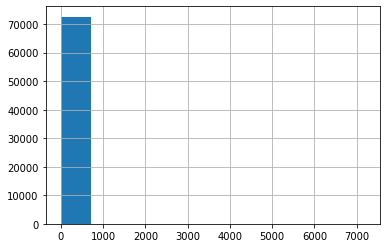

In [23]:
temp_data_2['distance_driver'].hist()

- Как видно по значению distance_drive в 75% случаев водитель назначается до 1,3 км до точки заказа
- Данный показатель не нужен

- 2 ---> Как писал выше в разные дни недели возможна активность в разное время
- Как вариант создать показатель "weekday_hour"

In [24]:
temp_data['weekday_hour'] = temp_data.apply(lambda x: round(x['weekday_key'] + ((x['hour_key']+1)/24),2), axis=1)
temp_data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class,ride_type,weekday_hour
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,2.0,1.0,5.62
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,1.0,1.0,6.62
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,1.0,1.0,4.71
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0,1.0,1.0,6.67
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0,1.0,1.0,5.88


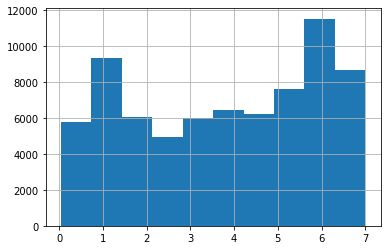

In [25]:
temp_data['weekday_hour'].hist()

- Считаю, что данный показатель более информативный. В случае необходимости расчитать коэффициент за повышенный спрос

- 3 ---> Удалим ненужные данные из базы для ее облегчения

Из показателей, которые не повлияют на обучение модели и их следует удалить:
- Наборы координат 'driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'
- Раздельные показатели дня недели 'weekday_key' и времени 'hour_key'
- Показатель 'duration_min' так как он имеет очень сильную корреляцию с показателем 'distance_km'

In [26]:
temp_data.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude', 'weekday_key','hour_key', 'duration_min'], axis=1, inplace=True)

- 4 ---> Тарифы у большенства операторов такси имеют +/- одинаковую формулу.Предположим, что это Яндекс-такси в Москве. С тарифами можно ознакомиться здесь https://taxi.yandex.ru/moscow/tariff/econom
- Применим упращенную формулу standart_price: (дистанция в км - норма, включенная в минимальный тариф) * ставку за км + минимальный тариф
- Далее можно применить повышающий коэффициент от повышенного спроса, который можно определить по новому показателю weekday_hour, но к сожалению не нашел принципов определения данного коэффициента

- Создадим показатели, необходимые для определения расчетной стоимости из данных о доступных тарифах Яндекс такси (к сожалению, наименования не совпадают, но применим их экспертно)
где
- Economy == Эконом
- Standard == Комфорт
- XL == Комфорт+
- Kids == Детский
- Delivery == Доставка
- Premium == Бизнес
- VIP == Премиум
- VIP+ == Элит

In [27]:
temp_data.loc[(temp_data.offer_class_group == 'Economy'), 'min_price'] = 129
temp_data.loc[(temp_data.offer_class_group == 'Standard'), 'min_price'] = 199
temp_data.loc[(temp_data.offer_class_group == 'XL'), 'min_price'] = 199
temp_data.loc[(temp_data.offer_class_group == 'Kids'), 'min_price'] = 149
temp_data.loc[(temp_data.offer_class_group == 'Delivery'), 'min_price'] = 149
temp_data.loc[(temp_data.offer_class_group == 'Premium'), 'min_price'] = 399
temp_data.loc[(temp_data.offer_class_group == 'VIP'), 'min_price'] = 799
temp_data.loc[(temp_data.offer_class_group == 'VIP+'), 'min_price'] = 1799

temp_data.loc[(temp_data.offer_class_group == 'Economy'), 'price_km'] = 10
temp_data.loc[(temp_data.offer_class_group == 'Standard'), 'price_km'] = 12
temp_data.loc[(temp_data.offer_class_group == 'XL'), 'price_km'] = 14
temp_data.loc[(temp_data.offer_class_group == 'Kids'), 'price_km'] = 11
temp_data.loc[(temp_data.offer_class_group == 'Delivery'), 'price_km'] = 10
temp_data.loc[(temp_data.offer_class_group == 'Premium'), 'price_km'] = 20
temp_data.loc[(temp_data.offer_class_group == 'VIP'), 'price_km'] = 45
temp_data.loc[(temp_data.offer_class_group == 'VIP+'), 'price_km'] = 50

temp_data.loc[(temp_data.offer_class_group == 'Economy'), 'norm_km'] = 3
temp_data.loc[(temp_data.offer_class_group == 'Standard'), 'norm_km'] = 2
temp_data.loc[(temp_data.offer_class_group == 'XL'), 'norm_km'] = 0
temp_data.loc[(temp_data.offer_class_group == 'Kids'), 'norm_km'] = 3
temp_data.loc[(temp_data.offer_class_group == 'Delivery'), 'norm_km'] = 3
temp_data.loc[(temp_data.offer_class_group == 'Premium'), 'norm_km'] = 1
temp_data.loc[(temp_data.offer_class_group == 'VIP'), 'norm_km'] = 1
temp_data.loc[(temp_data.offer_class_group == 'VIP+'), 'norm_km'] = 10

- Так как формула подраземевает разницу (дистанция в км - норма, включенная в минимальный тариф), отрицательных значений быть не должно поэтому создадим временный показатель temp_distance, который будет приравнивать значение к норме, если фактическая дистанция меньше нормы

In [28]:
temp_data['temp_distance'] = temp_data.apply(lambda x: x.distance_km if x.norm_km < x.distance_km else x.norm_km, axis=1)
temp_data.head()

,offer_gk,driver_gk,order_gk,distance_km,offer_class_group,ride_type_desc,driver_response,offer_class,ride_type,weekday_hour,min_price,price_km,norm_km,temp_distance
1,759733,6080,358774,18.802,Standard,private,1,2.0,1.0,5.62,199.0,12.0,2.0,18.802
2,416977,6080,866260,6.747,Economy,private,0,1.0,1.0,6.62,129.0,10.0,3.0,6.747
4,1120055,6080,506710,12.383,Economy,private,1,1.0,1.0,4.71,129.0,10.0,3.0,12.383
5,1058203,6080,360328,6.747,Economy,private,0,1.0,1.0,6.67,129.0,10.0,3.0,6.747
7,128861,6080,254374,1.517,Economy,private,0,1.0,1.0,5.88,129.0,10.0,3.0,3.000


- Теперь можно рассчитать стандартную стоимость поездки

In [29]:
temp_data['stardart_price'] = temp_data.apply(lambda x: round((x['temp_distance'] - x['norm_km']) * x['price_km'] + x['min_price'], 2), axis=1)
temp_data.head()

,offer_gk,driver_gk,order_gk,distance_km,offer_class_group,ride_type_desc,driver_response,offer_class,ride_type,weekday_hour,min_price,price_km,norm_km,temp_distance,stardart_price
1,759733,6080,358774,18.802,Standard,private,1,2.0,1.0,5.62,199.0,12.0,2.0,18.802,400.62
2,416977,6080,866260,6.747,Economy,private,0,1.0,1.0,6.62,129.0,10.0,3.0,6.747,166.47
4,1120055,6080,506710,12.383,Economy,private,1,1.0,1.0,4.71,129.0,10.0,3.0,12.383,222.83
5,1058203,6080,360328,6.747,Economy,private,0,1.0,1.0,6.67,129.0,10.0,3.0,6.747,166.47
7,128861,6080,254374,1.517,Economy,private,0,1.0,1.0,5.88,129.0,10.0,3.0,3.000,129.00


- 5 ---> После получения расчетной цены (на примере Яндекс-такси) можем удалить следующие показатели:
- Показатели 'offer_class_group' и 'ride_type_desc' так как созданы цифровые значения и получили промежуточные значения для расчета стоимости
- Показатели 'min_price', 'price_km', 'norm_km' и 'temp_distance', так как они были нужны для расчета цены поездки (при большей информации, можно было бы расчитать точные цены)

In [30]:
temp_data.drop(['offer_class_group', 'ride_type_desc', 'min_price', 'price_km', 'norm_km', 'temp_distance'], axis=1, inplace=True)
temp_data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
offer_gk,72609.0,565671.622154,326325.645517,4.000,284733.000,564488.000,849625.000,1130355.000
driver_gk,72609.0,3458.589954,2037.735920,14.000,1421.000,3507.000,5242.000,6806.000
order_gk,72609.0,462013.199176,266087.751333,27.000,230773.000,463389.000,692558.000,920344.000
distance_km,72609.0,23.653493,18.378983,0.005,7.844,18.249,37.763,74.954
driver_response,72609.0,0.474294,0.499342,0.000,0.000,0.000,1.000,1.000
offer_class,72609.0,1.567423,0.879409,1.000,1.000,1.000,2.000,8.000
ride_type,72609.0,1.002686,0.056584,1.000,1.000,1.000,1.000,3.000
weekday_hour,72609.0,3.771222,2.115024,0.040,1.830,3.920,5.750,7.000
stardart_price,72609.0,397.052843,223.098784,129.000,215.860,328.460,557.180,3344.110


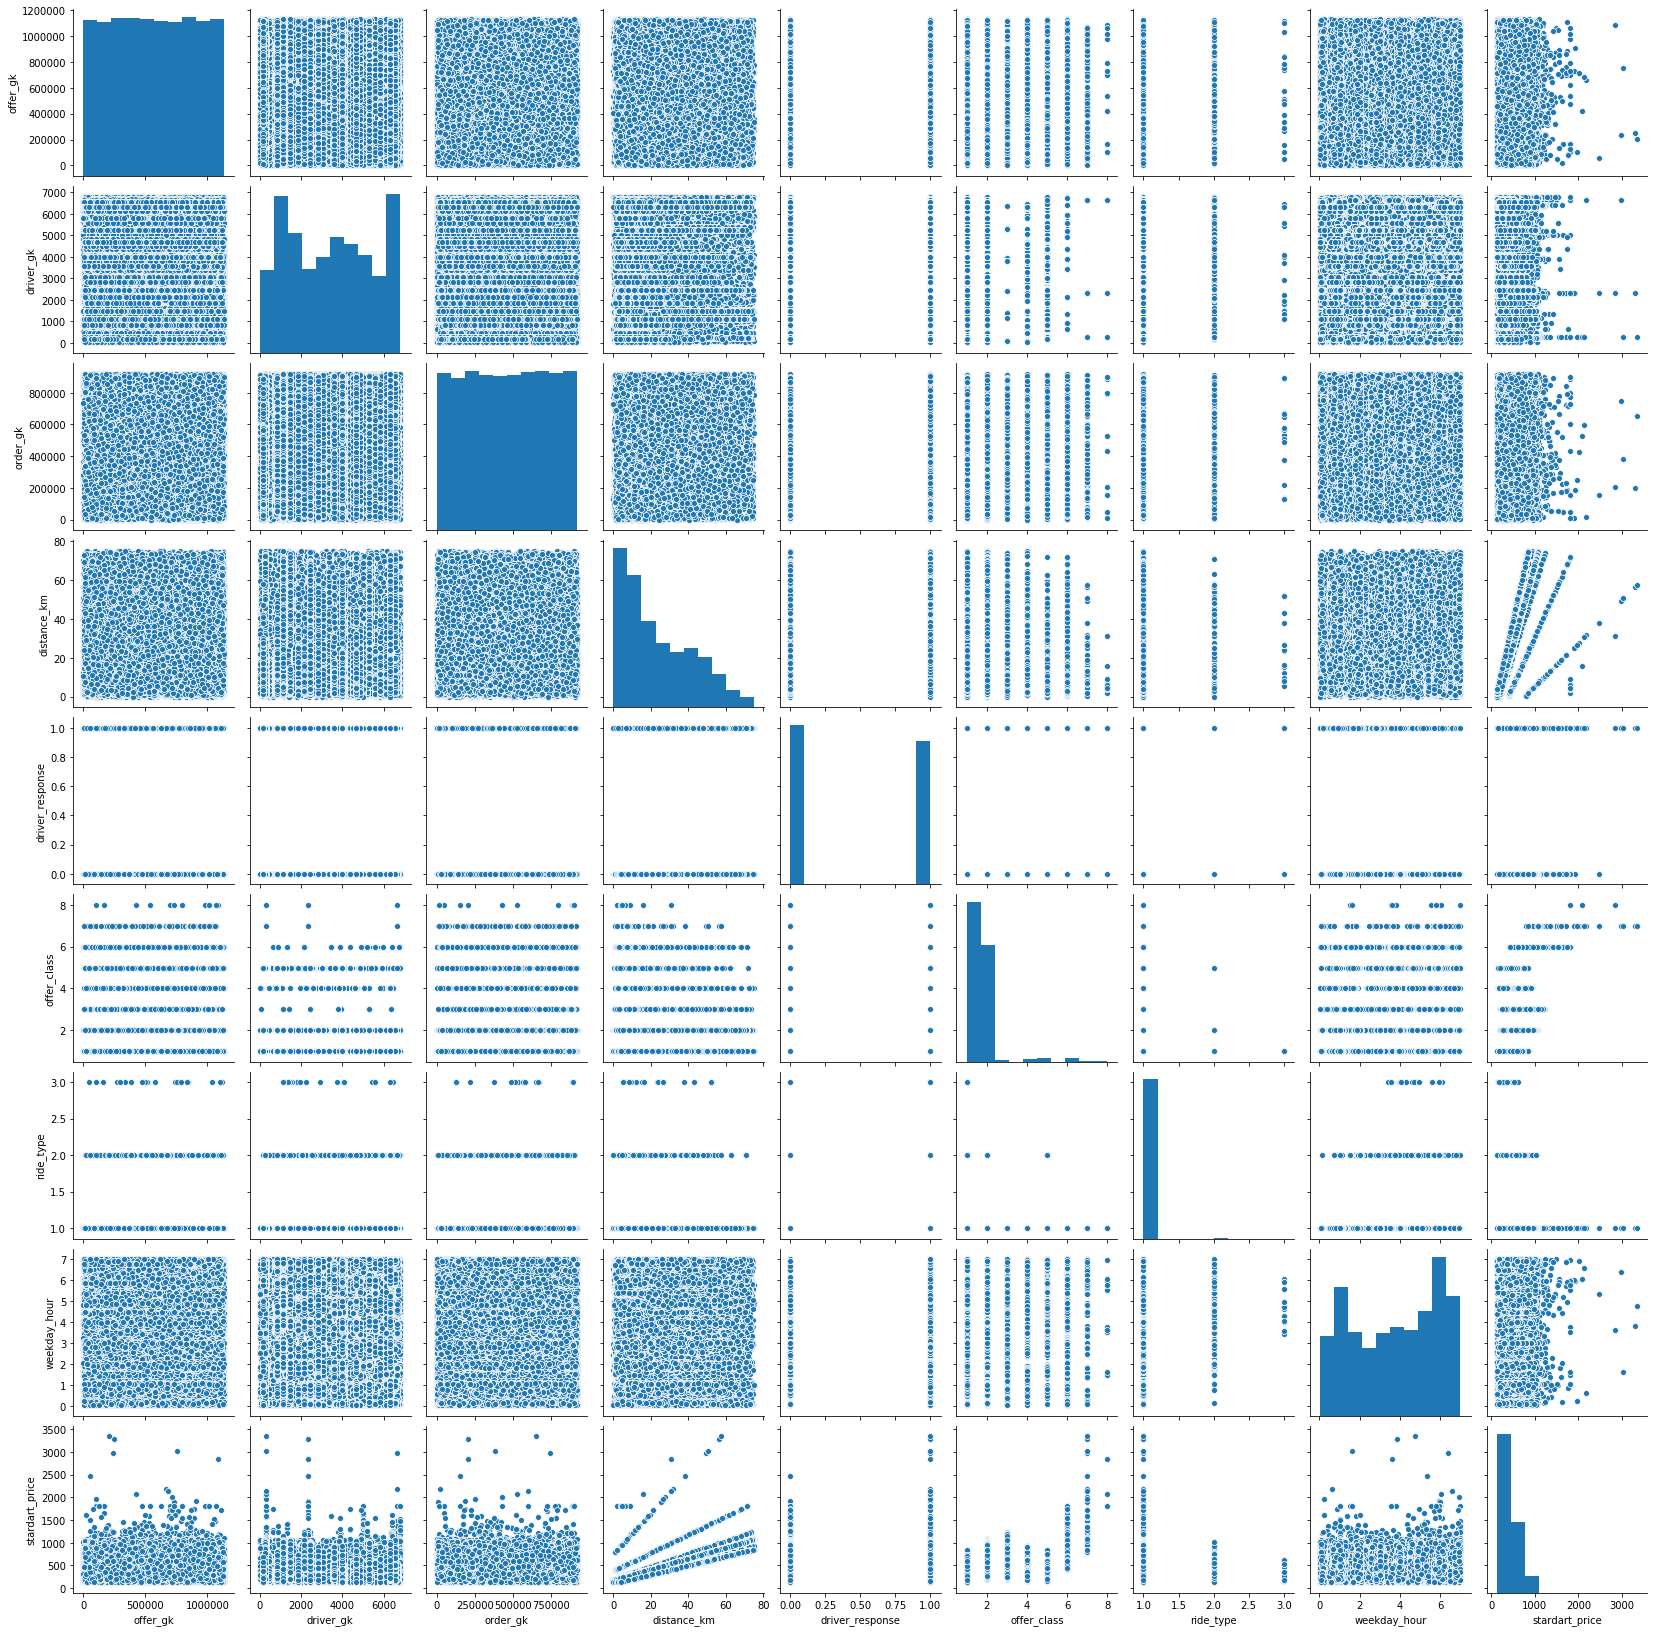

In [31]:
sns.pairplot(temp_data)

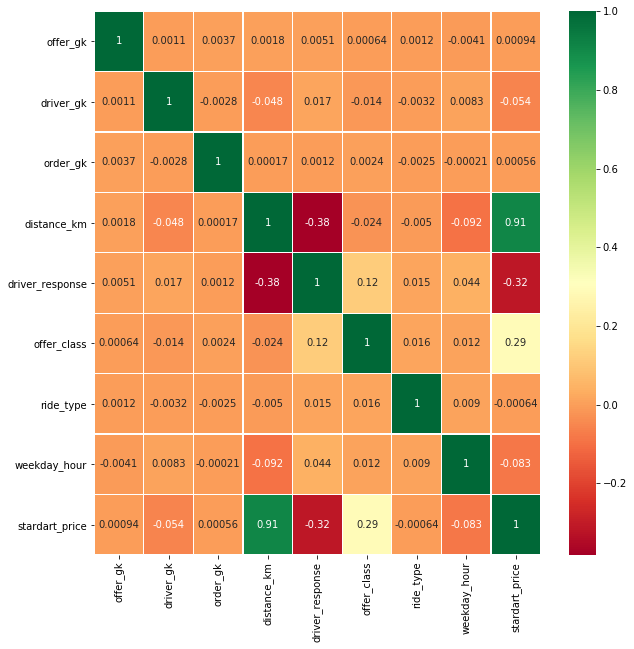

In [32]:
sns.heatmap(temp_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

- После очистки от выбросов и пустот и после создания новых показателей:
- distance_km и standart_price имеют сильную корреляцию, но при этом не "1"
- distance_km и driver_response имеет отрицательную корреляцию (но не очень сильную). Т.е.чем больше дистанция, тем меньше вероятность, что оставят отклик! Интересное наблюдение)))
- offer_class и stardart_price имеют прямую, хоть и не сильную корреляцию

- Для дальнейшей работы берем целевой показатель standart_price

Выделим важные показатели при обучении можели:
- distance_km, driver_response, offer_class, ride_type, weekday_hour

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [34]:
X = temp_data[['distance_km', 'driver_response', 'offer_class', 'ride_type', 'weekday_hour']]
y = temp_data['stardart_price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(temp_data[['distance_km', 'driver_response', 'offer_class', 'ride_type', 'weekday_hour']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [11.16437738 -0.72841671 79.57627018 -4.22196008 -0.19281185]
Bias: 13.552584803792342
Error: 30.137218384352426


In [35]:
print('Процент ошибки к медиане: ', round(mean_absolute_error(pred_values, y)/y.median()*100,2), '%')

Процент ошибки к медиане:  9.18 %


### 7. Разделите выборку на обучаемую и тестовую.

- Сделам базу только с нашими показателями

In [36]:
clien_data = temp_data[['distance_km', 'driver_response', 'offer_class', 'ride_type', 'weekday_hour', 'stardart_price']]
clien_data.head()

,distance_km,driver_response,offer_class,ride_type,weekday_hour,stardart_price
1,18.802,1,2.0,1.0,5.62,400.62
2,6.747,0,1.0,1.0,6.62,166.47
4,12.383,1,1.0,1.0,4.71,222.83
5,6.747,0,1.0,1.0,6.67,166.47
7,1.517,0,1.0,1.0,5.88,129.00


In [37]:
X_columns = [c for c in clien_data.columns if c != 'stardart_price']
y_column = 'stardart_price'

X_columns, y_column

(['distance_km',
  'driver_response',
  'offer_class',
  'ride_type',
  'weekday_hour'],
 'stardart_price')

In [38]:
X = clien_data[X_columns]
y = clien_data[y_column]

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

- Разделим выборку на 80/20 (test_size=0.2) и зафиксируем случайное состояние (random_state=30)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [41]:
X_train.shape, X_test.shape

((58087, 5), (14522, 5))

In [42]:
y_train.shape, y_test.shape

((58087,), (14522,))

### 8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

- Обучение

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, y_train)

y_pred = estimator.predict(X_test)

- Оценим обученую модель

In [44]:
print('Train MAE: {}'.format(mean_absolute_error(y_train, estimator.predict(X_train))))
print('Test MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

Train MAE: 30.011315023855296
Test MAE: 29.736765820605772


- Размер ошибки на обучении и на тесте практически одинаковые, значит мы не переобучаемся

In [45]:
pred_values.mean()

397.0528433114352

- Посмотрим коэффициенты

In [46]:
for col, w in zip(estimator.coef_, X.columns):
    print(col,w)

11.166762319072491 distance_km
-0.6431389973401247 driver_response
80.33999928817944 offer_class
-5.826215291118667 ride_type
-0.2801793294208582 weekday_hour


- и сдвиг

In [47]:
estimator.intercept_

14.288730224483402

- offer_class имеет очень большой вес, это логично, так как он определяет минимальную стоимость заказа (Исключение данного показателя сильно увеличит MAE ~66)
- ride_type влияет на показатель отрицательно и с низким весом (Исключение данного показателя очень незначительно уменьшит MAE ~0,003)

In [48]:
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("MAE: \t", round(mean_absolute_error(y_test, y_pred), 2))

R2: 	 0.9355731966194129
RMSE: 	 56.07
MAE: 	 29.74


- Считаю, что стоит оставить текущую модель без изменений, так как важные показатели исключать не рекомендуется, не несущественно влияющие, но влияющие лучше оставить.

### Работа завершена, все пункты чек-листа выполнены. Спасибо